In [2]:
import pandas as pd
df=pd.read_csv('mobile_dataset.csv')
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


#### Univariate Selection

In [3]:
X=df.iloc[:,:-1]
y=df['price_range']

In [4]:
X.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


In [5]:
y.head(3)

0    1
1    2
2    2
Name: price_range, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [8]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [ ]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
df_scores.head(3)

In [10]:
df_columns=pd.DataFrame(X.columns)
df_columns.head(3)

,0
0,battery_power
1,blue
2,clock_speed


In [11]:
features_rank=pd.concat([df_columns,df_scores],axis=1)
features_rank.head(3)

,0,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366


In [12]:
features_rank.columns=['Feature','Scores']
features_rank.head(3)

,Feature,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366


#### Feature Importance 

This gives a score to each feature of the dataset. Higher the score, more relevant the feature. Both feature selection and importance should be considered

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [14]:
model.feature_importances_

array([0.06127764, 0.01996318, 0.034173  , 0.02020237, 0.03167874,
       0.01708899, 0.03461391, 0.03398446, 0.03657873, 0.03299593,
       0.03310466, 0.04900155, 0.04824117, 0.39210796, 0.03363492,
       0.03498492, 0.03509098, 0.01342216, 0.01820597, 0.01964876])

In [15]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.head(3)
ranked_features.nlargest(10)

ram              0.392108
battery_power    0.061278
px_height        0.049002
px_width         0.048241
mobile_wt        0.036579
talk_time        0.035091
sc_w             0.034985
int_memory       0.034614
clock_speed      0.034173
m_dep            0.033984
dtype: float64

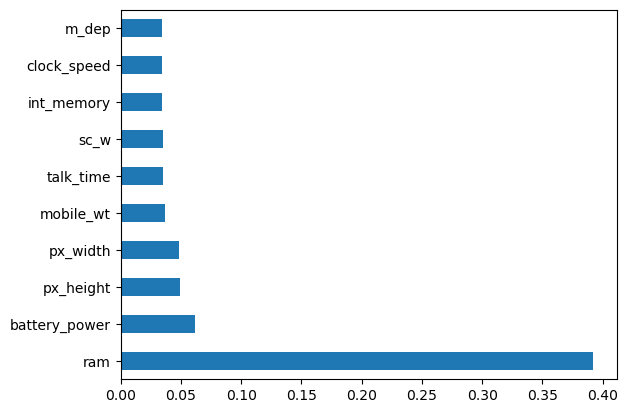

In [16]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
#ranked_features=pd.DataFrame(model.feature_importances_,index=X.columns)
#ranked_features.head(3)

#### Correlation

In [18]:
import seaborn as sns
df.corr().head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606


In [22]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index
top_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

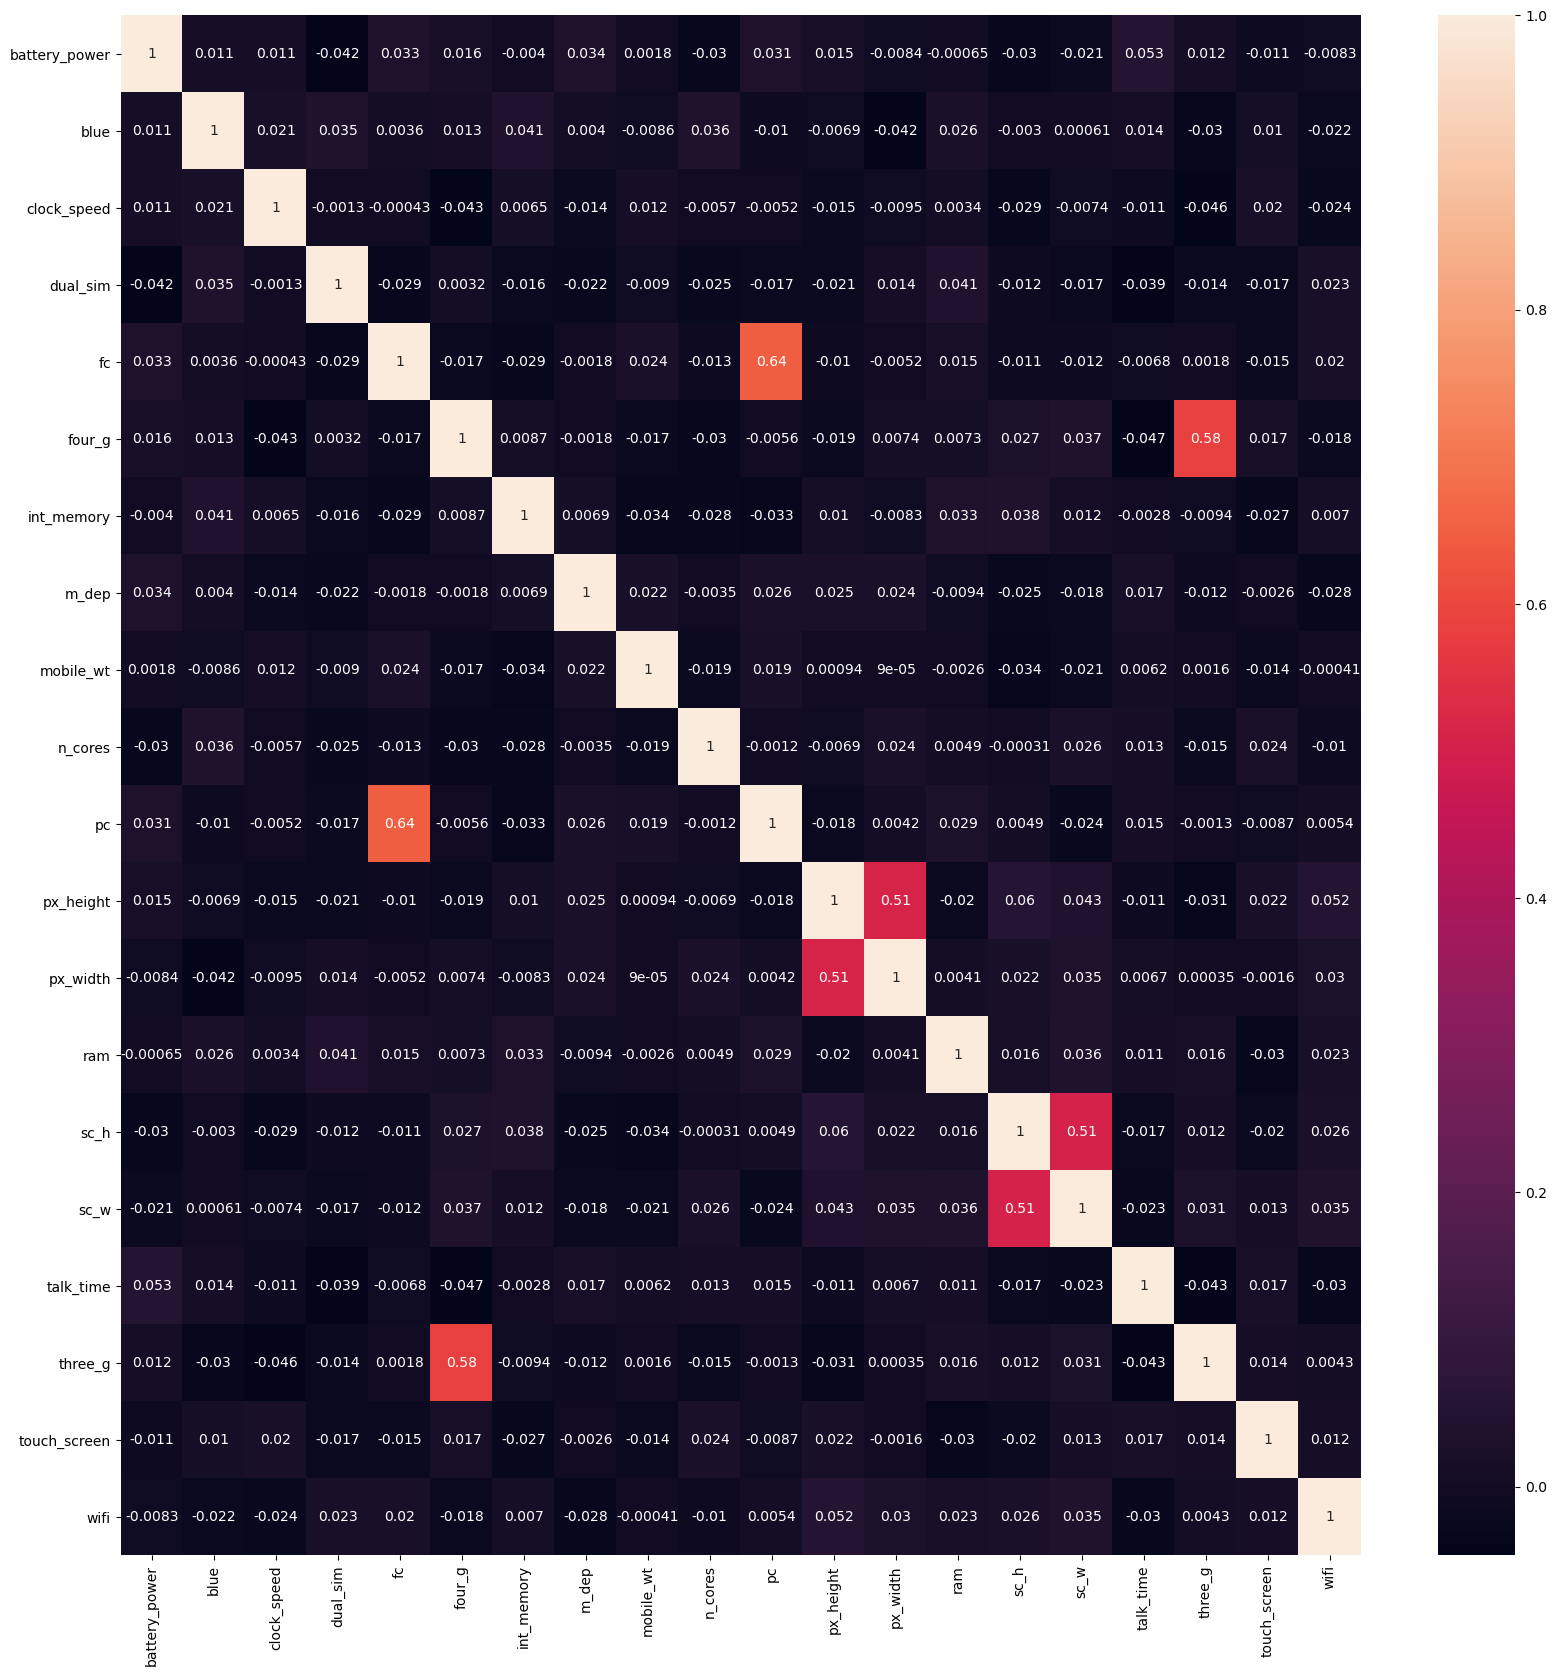

In [23]:
import numpy as np
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [25]:
threshold=0.5

In [28]:
#find and remove correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr       

In [29]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

#### Information Gain

Gives you dependency between X and y

In [32]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.845447
px_height        0.034081
battery_power    0.032625
px_width         0.023179
four_g           0.019495
dual_sim         0.016369
sc_w             0.015206
sc_h             0.014979
n_cores          0.010802
mobile_wt        0.005255
touch_screen     0.000000
three_g          0.000000
talk_time        0.000000
pc               0.000000
blue             0.000000
m_dep            0.000000
int_memory       0.000000
fc               0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64